In [92]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the training data into feature matrix, class labels, and event ids:

In [93]:
# predictions 1 is "s", -1 is "b"
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [69]:
print(tX.shape)
tX

(250000, 30)


array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

## Preprocessing

In [94]:
from clean_data_4_categories import *

# save ind_delete to delete indices from test data
#tX_clean, ind_delete = update_X(tX, bound_delete=0.9, bound_change=0.05)

#Divide the data in 4 categories depending on the value of PRI_jet_num (column 22), and remove all columns where standard variation is 0
print("tX1:")
tX1 = tX[tX[:, 22]==0.]
tX1 = clean_data(tX1)
y1 = y[tX[:, 22]==0.]
print("number of features:", tX1.shape[1])

print("tX2:")
tX2 = tX[tX[:, 22]==1.]
tX2 = np.delete(tX2, 22, axis=1)
tX2 = clean_data(tX2)
y2 = y[tX[:, 22]==1.]
print("number of features:", tX2.shape[1])

print("tX3")
tX3 = tX[tX[:, 22]==2.]
tX3 = np.delete(tX3, 22, axis=1)
tX3 = clean_data(tX3)
y3 = y[tX[:, 22]==2.]
print("number of features:", tX3.shape[1])

print("tX4")
tX4 = tX[tX[:, 22]==3.]
tX4 = np.delete(tX4, 22, axis=1)
tX4 = clean_data(tX4)
y4 = y[tX[:, 22]==3.]
print("number of features:", tX4.shape[1])

print(y1.shape[0] + y2.shape[0] + y3.shape[0] + y4.shape[0])

tX1:
Column : 4
Column : 5
Column : 6
Column : 12
Column : 22
Column : 23
Column : 24
Column : 25
Column : 26
Column : 27
Column : 28
Column : 29
number of features: 18
tX2:
Column : 4
Column : 5
Column : 6
Column : 12
Column : 25
Column : 26
Column : 27
number of features: 22
tX3
number of features: 29
tX4
number of features: 29
250000


In [60]:
#import pandas as pd

#df = pd.read_csv('../data/train.csv')
#df.describe()

In [88]:
from split_expand_data import *

# split data into train and test sets
X1_train, y1_train, X1_test, y1_test = split_data(tX1, y1, split_ratio=0.7)
X2_train, y2_train, X2_test, y2_test = split_data(tX2, y2, split_ratio=0.7)
X3_train, y3_train, X3_test, y3_test = split_data(tX3, y3, split_ratio=0.7)
X4_train, y4_train, X4_test, y4_test = split_data(tX4, y4, split_ratio=0.7)

# store d to later use with real test set
d=7

# create expanded X_train and X_test and normalize

#Category 1
X1_train_poly, X1_mu_train_poly, X1_std_train_poly = expand_and_normalize_X(X1_train, d)
X1_test_poly  = expand_X_cross_1_trigo(X1_test, d, 2)
X1_test_poly[:,1:] = (X1_test_poly[:,1:] - X1_mu_train_poly) / X1_std_train_poly

#Category 1
X2_train_poly, X2_mu_train_poly, X2_std_train_poly = expand_and_normalize_X(X2_train, d)
X2_test_poly  = expand_X_cross_1_trigo(X2_test, d, 2)
X2_test_poly[:,1:] = (X2_test_poly[:,1:] - X2_mu_train_poly) / X2_std_train_poly

#Category 1
X3_train_poly, X3_mu_train_poly, X3_std_train_poly = expand_and_normalize_X(X3_train, d)
X3_test_poly  = expand_X_cross_1_trigo(X3_test, d, 2)
X3_test_poly[:,1:] = (X3_test_poly[:,1:] - X3_mu_train_poly) / X3_std_train_poly

#Category 1
X4_train_poly, X4_mu_train_poly, X4_std_train_poly = expand_and_normalize_X(X4_train, d)
X4_test_poly  = expand_X_cross_1_trigo(X4_test, d, 2)
X4_test_poly[:,1:] = (X4_test_poly[:,1:] - X4_mu_train_poly) / X4_std_train_poly

enter
[[ 1.17325e+02  6.40200e+00  8.31050e+01 ...  5.80800e+00 -2.88800e+00
   1.40077e+02]
 [ 2.62778e+02  8.11560e+01  1.51688e+02 ...  3.15700e+01 -7.43000e-01
   1.50449e+02]
 [-9.99000e+02  7.13300e+01  5.34020e+01 ...  4.84310e+01  1.16000e-01
   5.12870e+01]
 ...
 [ 1.12190e+02  9.63100e+01  7.40650e+01 ...  4.15280e+01 -1.76800e+00
   2.02175e+02]
 [ 7.74630e+01  1.63350e+01  5.49560e+01 ...  3.39400e+00 -3.02000e+00
   5.28430e+01]
 [ 8.67170e+01  5.69740e+01  6.13450e+01 ...  2.10260e+01 -5.36000e-01
   9.17860e+01]]
[[ 1.40077e+02  1.17325e+02  6.40200e+00 ... -2.43600e+00  5.80800e+00
  -2.88800e+00]
 [ 1.50449e+02  2.62778e+02  8.11560e+01 ...  2.32800e+00  3.15700e+01
  -7.43000e-01]
 [ 5.12870e+01 -9.99000e+02  7.13300e+01 ...  3.06200e+00  4.84310e+01
   1.16000e-01]
 ...
 [ 2.02175e+02  1.12190e+02  9.63100e+01 ...  8.79000e-01  4.15280e+01
  -1.76800e+00]
 [ 5.28430e+01  7.74630e+01  1.63350e+01 ...  1.22600e+00  3.39400e+00
  -3.02000e+00]
 [ 9.17860e+01  8.67170e+0

enter
[[ 1.00284e+02  1.64750e+01  6.90190e+01 ...  2.39900e+00 -2.96700e+00
   8.25130e+01]
 [ 9.95010e+01  3.16380e+01  3.92140e+01 ... -2.64200e+00  5.23000e-01
   3.08631e+02]
 [ 1.92420e+02  1.12764e+02  1.00347e+02 ...  1.66200e+00  1.83000e-01
   1.00584e+02]
 ...
 [ 1.13468e+02  5.35200e+00  7.37020e+01 ... -3.57400e+00  1.14400e+00
   1.95134e+02]
 [ 9.53680e+01  1.05880e+02  6.64960e+01 ...  2.96100e+00  7.70000e-01
   1.09368e+02]
 [ 1.12721e+02  1.91210e+01  7.49110e+01 ... -2.60100e+00  3.60000e-02
   1.57042e+02]]
[[ 8.25130e+01  1.00284e+02  1.64750e+01 ...  3.81620e+01  2.39900e+00
  -2.96700e+00]
 [ 3.08631e+02  9.95010e+01  3.16380e+01 ...  4.49520e+01 -2.64200e+00
   5.23000e-01]
 [ 1.00584e+02  1.92420e+02  1.12764e+02 ...  3.86050e+01  1.66200e+00
   1.83000e-01]
 ...
 [ 1.95134e+02  1.13468e+02  5.35200e+00 ...  8.26040e+01 -3.57400e+00
   1.14400e+00]
 [ 1.09368e+02  9.53680e+01  1.05880e+02 ...  4.19990e+01  2.96100e+00
   7.70000e-01]
 [ 1.57042e+02  1.12721e+0

# Do your thing crazy machine learning thing here :) ...

### I - Least Squares GD:

In [53]:
from least_squares_GD import *


max_iters = 300
gamma = 0.008

initial_w1 = np.random.normal(0, 1e-1, X1_train_poly.shape[1])
w1, loss1 = least_squares_GD(y1_train, X1_train_poly, initial_w1, max_iters, gamma)
print(loss1)

initial_w2 = np.random.normal(0, 1e-1, X2_train_poly.shape[1])
w2, loss2 = least_squares_GD(y2_train, X2_train_poly, initial_w2, max_iters, gamma)
print(loss2)

initial_w3 = np.random.normal(0, 1e-1, X3_train_poly.shape[1])
w3, loss3 = least_squares_GD(y3_train, X3_train_poly, initial_w3, max_iters, gamma)
print(loss3)

initial_w4 = np.random.normal(0, 1e-1, X4_train_poly.shape[1])
w4, loss4 = least_squares_GD(y4_train, X4_train_poly, initial_w4, max_iters, gamma)
print(loss4)

0.27469350541646415
0.36255526428188595
0.3611027320775547
0.3646255985397779


### II Least Squares SGD

In [28]:
# I think this is shitty cause we have 72 params so needs param optimization

from least_squares_SGD import *

initial_w = np.random.normal(0, 1e-1, X_train_poly.shape[1])
max_iters = 100
gamma = 0.001

w, loss = least_squares_SGD(y_train, X_train_poly, initial_w, max_iters, gamma)
print(loss)

0.9715214812097751


### III Least Squares

In [ ]:
# crooss validation and bias variance playing around

In [50]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [51]:
# you can use expand X its same
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    pm = np.ones((x.shape[0],degree+1))
    for i in range(degree+1): pm[:,i] = x**i 
    return pm

In [53]:
from costs import compute_loss_mse
from least_squares import *

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_test = y[te_indice]
    y_train = y[tr_indice]
    x_test = x[te_indice]
    x_train = x[tr_indice]
    
    x_train_poly = build_poly(x_train, degree)
    x_test_poly = build_poly(x_test, degree)

    w = least_squares(y_train, x_train_poly, lambda_)[0]
    
    loss_tr = compute_loss_mse(y_train, x_train_poly, w)
    loss_te = compute_loss_mse(y_test, x_test_poly, w)
    return loss_tr, loss_te, w

In [54]:
import matplotlib.pyplot as plt

# this can be used to validate our lambdas
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [65]:
def bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te):
    """visualize the bias variance decomposition."""
    rmse_tr_mean = np.expand_dims(np.mean(rmse_tr, axis=0), axis=0)
    rmse_te_mean = np.expand_dims(np.mean(rmse_te, axis=0), axis=0)
    plt.plot(
        degrees,
        rmse_tr.T,
        'b',
        linestyle="-",
        color=([0.7, 0.7, 1]),
        label='train',
        linewidth=0.3)
    plt.plot(
        degrees,
        rmse_te.T,
        'r',
        linestyle="-",
        color=[1, 0.7, 0.7],
        label='test',
        linewidth=0.3)
    plt.plot(
        degrees,
        rmse_tr_mean.T,
        'b',
        linestyle="-",
        label='train',
        linewidth=3)
    plt.plot(
        degrees,
        rmse_te_mean.T,
        'r',
        linestyle="-",
        label='test',
        linewidth=3)
    plt.ylim(0.2, 0.7)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.title("Bias-Variance Decomposition")
    plt.savefig("bias_variance")
    
    # COMMENT THIS FOR NO Y LOG SCALE
    plt.yscale("log")

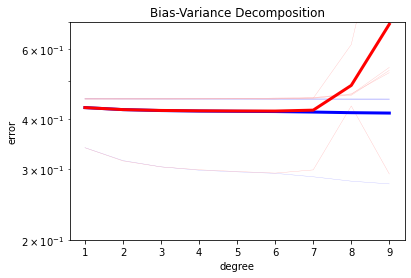

In [66]:
def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(5)
    ratio_train = 0.7
    degrees = range(1, 10)
    
    # define list to store the variable
    mse_tr = np.empty((len(seeds), len(degrees)))
    mse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        x_train, y_train, x_test, y_test = split_data(tX_clean, y, split_ratio=ratio_train, seed=seed)
        for i, d in enumerate(degrees):
            X_train_poly, mu_train_poly, std_train_poly = expand_and_normalize_X(X_train,d)
            X_test_poly  = expand_X(X_test,d)
            X_test_poly[:,1:]  = (X_test_poly[:,1:]-mu_train_poly)/std_train_poly
            w = least_squares(y_train, X_train_poly)[0]
            mse_tr[index_seed, i] = compute_loss_mse(y_train, X_train_poly, w)
            mse_te[index_seed, i] = compute_loss_mse(y_test, X_test_poly, w)

    bias_variance_decomposition_visualization(degrees, mse_tr, mse_te)

bias_variance_demo()

In [ ]:
# iii least squares

In [89]:
from least_squares import *

w1, loss_analytical1 = least_squares(y1_train, X1_train_poly)
print(loss_analytical1)
print(compute_loss_mse(y1_test, X1_test_poly, w1))

w2, loss_analytical2 = least_squares(y2_train, X2_train_poly)
print(loss_analytical2)
print(compute_loss_mse(y2_test, X2_test_poly, w2))

w3, loss_analytical3 = least_squares(y3_train, X3_train_poly)
print(loss_analytical3)
print(compute_loss_mse(y3_test, X3_test_poly, w3))

w4, loss_analytical4 = least_squares(y4_train, X4_train_poly)
print(loss_analytical4)
print(compute_loss_mse(y4_test, X4_test_poly, w4))

0.2327024807319274
7.816363871906081e+18
0.30172466687292643
2.1173065478484294
0.2641333709548907
3.065267608282525
0.27070210461447897
0.5774295415702042


### IV Ridge Regression

In [8]:
from ridge_regression import * 

In [7]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    N = tx.shape[0]
    lambda_prim = 2 * N * lambda_
    w = np.linalg.solve(tx.T@tx + lambda_prim * np.eye(tx.shape[1]), tx.T@y)
    loss = compute_loss_mse(y, tx, w)
    return w, loss

In [8]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, y_train, x_test, y_test = split_data(x.reshape(-1,1), y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train_poly = expand_X(x_train.reshape(-1,1), degree)
    x_test_poly = expand_X(x_test.reshape(-1,1), degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w = ridge_regression(y_train, x_train_poly, lambda_)[0]
        rmse_tr.append(np.sqrt(2 * compute_loss_mse(y_train, x_train_poly, w)))
        rmse_te.append(np.sqrt(2 * compute_loss_mse(y_test, x_test_poly, w)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

In [9]:
lambdas = np.logspace(-6, -1, 6)

ws = []
rmse_tr = []
rmse_te = []

for ind, lambda_ in enumerate(lambdas):
        ws.append(ridge_regression(y_train, X_train_poly, lambda_)[0])
        rmse_tr.append(compute_loss_mse(y_train, X_train_poly, ws[ind]))
        rmse_te.append(compute_loss_mse(y_test, X_test_poly, ws[ind]))
        print("lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))

lambda=0.000, Training RMSE=0.305, Testing RMSE=0.304
lambda=0.000, Training RMSE=0.305, Testing RMSE=0.304
lambda=0.000, Training RMSE=0.305, Testing RMSE=0.305
lambda=0.001, Training RMSE=0.307, Testing RMSE=0.307
lambda=0.010, Training RMSE=0.314, Testing RMSE=0.313
lambda=0.100, Training RMSE=0.331, Testing RMSE=0.330


In [10]:
ridge_regression(y_train, X_train_poly, 0)

(array([-3.15474286e-01,  6.77529378e-01, -4.22039212e-01, -5.51052710e-01,
         8.99065201e-02, -3.75536931e-01, -2.13243403e-01, -1.14473816e-01,
         1.24747316e+00, -3.31809689e-02, -6.31141236e+02, -3.84163917e-01,
        -8.47572779e-02, -1.06810177e-01,  1.22403049e+02,  9.72797798e-04,
         1.69181316e-03,  1.20542059e+02,  2.75786260e-03,  3.86780773e-03,
        -8.82199244e-02, -3.32663399e-03,  1.69580991e-01,  5.18569552e-02,
         2.72289144e-01, -4.20355848e-03, -3.91659604e-03,  8.29900849e-02,
        -9.10722307e-04, -3.69354736e-03,  5.35046215e+02, -1.13175934e+00,
         3.65900660e-01,  4.15273185e-01,  1.70606432e-01,  9.21617278e-01,
         2.62932249e-01,  3.71729879e-02, -1.73762692e+00,  1.79908084e-01,
        -1.08092423e-01,  3.70958310e-01,  2.02638294e-02,  3.92051041e-01,
        -3.13994379e-01, -3.51747184e-02, -1.30863801e-03, -3.84613682e-01,
        -5.55234150e-02, -2.32662678e-03,  2.73236330e-01, -1.61701016e-03,
        -3.7

### V Logistic Regression

In [16]:
from logistic_regression import *

y_train_log = y_train
y_test_log = y_test

y_train_log[y_train == -1] = 0
y_test_log[y_test == -1] = 0


max_iters = 80
initial_w = np.random.normal(0, 1e-4, X_train_poly.shape[1])
gammas = np.logspace(-7, -4, 5)

# for gamma in gammas
ws = []
losses = []

for ind, gamma in enumerate(gammas):
    w, loss = logistic_regression(y_train_log, X_train_poly, initial_w, max_iters, gamma)
    ws.append(w)
    losses.append(loss)
    print("lambda={g:.10f}, Loss sigmoid={loss:.3f}".format(
               g=gamma, loss=losses[ind]))

print(loss)

lambda=0.0000001000, Loss sigmoid=99061.638
lambda=0.0000005623, Loss sigmoid=88225.033
lambda=0.0000031623, Loss sigmoid=81996.026


/Users/bindas/Documents/EPFL/ML/Project-1-ML-AICrowd/src/logistic_regression.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-t))
/Users/bindas/Documents/EPFL/ML/Project-1-ML-AICrowd/src/logistic_regression.py:11: RuntimeWarning: overflow encountered in exp
  #return np.sum(np.log(1 + np.exp(tx @ w)) - y * (tx @ w))


lambda=0.0000177828, Loss sigmoid=inf
lambda=0.0001000000, Loss sigmoid=inf
inf


### VI Regularized Logistic Regression

In [1]:
from reg_logistic_regression import *

In [18]:
def calculate_gradient_log_reg(y, tx, w):
    """compute the gradient of loss."""
    return tx.T@(sigmoid(tx@w)-y)

In [31]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
#     S = sigmoid(tx @ w) * (1 - sigmoid(tx @ w))
#     S_diag = np.diag(S[:])
#     print(S_diag.shape)
#     return tx.T @ S_diag @ tx
    h = sigmoid(tx@w)
    print(h.shape)
    h = np.diag(h.reshape(-1,1).T[0])
    r = np.multiply(h, (1-h))
    return tx.T@r@tx

In [23]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient and hessian"""
    loss = calculate_loss_log(y, tx, w) + lambda_ * (np.linalg.norm(w, 2) ** 2) / 2
    grad = calculate_gradient_log_reg(y, tx, w)
    hess = calculate_hessian(y, tx, w) + lambda_
    return loss, grad, hess

In [24]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, grad, hess = penalized_logistic_regression(y, tx, w, lambda_)
    w = w - gamma * np.linalg.inv(hess) @ grad
    return w, loss

In [25]:
def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    """
    Perform max iterations of logistic regression with regularization
    Return loss and updated weights
    """
    losses = []
    w = initial_w

    for i in range(max_iters):
        w, loss = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        if not (i % 10): 
            print('Iteration {}, loss {}'.format(i, loss))
        losses.append(loss)

    return w, losses[-1]
    

In [48]:
# Code that I was running in jupyter notebook

y_train_log = y_train
y_test_log = y_test

y_train_log[y_train == -1] = 0
y_test_log[y_test == -1] = 0


max_iters = 2000
initial_w = np.random.normal(0, 1e-4, X_train_poly.shape[1])

gamma = 0.000001
lambda_ = 0.001

w, loss = reg_logistic_regression(y_train_log, X_train_poly, lambda_, initial_w, max_iters, gamma)

Iteration 0, loss 121275.04979087909
Iteration 10, loss 97161.8417913283
Iteration 20, loss 92699.47494349162
Iteration 30, loss 90278.92646500793
Iteration 40, loss 88721.3050700632
Iteration 50, loss 87628.93718029979
Iteration 60, loss 86809.74657133948
Iteration 70, loss 86164.07406133984
Iteration 80, loss 85635.05129909952
Iteration 90, loss 85188.48851711069
Iteration 100, loss 84803.24418018987
Iteration 110, loss 84465.34880531556
Iteration 120, loss 84165.46931500878
Iteration 130, loss 83897.32498255509
Iteration 140, loss 83655.60453856904
Iteration 150, loss 83436.08998412573
Iteration 160, loss 83235.47777154398
Iteration 170, loss 83051.09322821422
Iteration 180, loss 82880.72678712227
Iteration 190, loss 82722.5475789409
Iteration 200, loss 82575.05233046546
Iteration 210, loss 82437.00885134288
Iteration 220, loss 82307.39041174664
Iteration 230, loss 82185.31985540665
Iteration 240, loss 82070.03474681178
Iteration 250, loss 81960.86822061545
Iteration 260, loss 81857

### A)* Cross Validation (do we need it???)

In [11]:
def fold_indices(num_examples,k_fold):
    """
    Splits data indices
    num_examples: total samples in the dataset
    k_fold: number fold of Cross Validation
    
    Returns
    -------
    array of shuffled indices with shape (k_fold, num_examples//k_fold)
    """
    ind = np.arange(num_examples)
    split_size = num_examples//k_fold
    
    # shuffle data
    np.random.shuffle(ind)
    
    k_fold_indices = []
    # Generate k_fold set of indices
    k_fold_indices = [ind[k*split_size:(k+1)*split_size] for k in range(k_fold)]
         
    return np.array(k_fold_indices)

## Predictions based on w

In [90]:
# from helpers

p1 = predict_labels(w1, X1_test_poly)
p2 = predict_labels(w2, X2_test_poly)
p3 = predict_labels(w3, X3_test_poly)
p4 = predict_labels(w4, X4_test_poly)

In [91]:
accuracy1 = (np.mean(p1 == y1_test) * 100)
print('Train Accuracy Category 1: %.1f %%' % accuracy1)
accuracy2 = (np.mean(p2 == y2_test) * 100)
print('Train Accuracy Category 2: %.1f %%' % accuracy2)
accuracy3 = (np.mean(p3 == y3_test) * 100)
print('Train Accuracy Category 3: %.1f %%' % accuracy3)
accuracy4 = (np.mean(p4 == y4_test) * 100)
print('Train Accuracy Category 4: %.1f %%' % accuracy4)
print(np.sum([len(y1_test)*accuracy1, len(y2_test)*accuracy2, len(y3_test)*accuracy3, len(y4_test)*accuracy4])/(len(y1_test)+len(y2_test)+len(y3_test)+len(y4_test)))

Train Accuracy Category 1: 84.7 %
Train Accuracy Category 2: 79.2 %
Train Accuracy Category 3: 82.2 %
Train Accuracy Category 4: 82.1 %
82.26847284072424


In [69]:
def predict_log()

SyntaxError: invalid syntax (<ipython-input-69-5a000520c87a>, line 1)

In [20]:
p = np.where(X_test_poly@w > 0.5, 1, 0)
print('Train Accuracy: %.1f %%' % (np.mean(p == y_test_log) * 100))

NameError: name 'X_test_poly' is not defined

In [ ]:
# predict log

In [231]:
# check for lambdas

for i, w in enumerate(ws):
    p = np.where(X_test_poly@w > 0.5, 1, 0)
    print("Lambda: {}".format(lambdas[i]))
    print('Train Accuracy: %.1f %%' % (np.mean(p == y_test_log) * 100))

Lambda: 1e-07
Train Accuracy: 72.3 %
Lambda: 5.62341325190349e-07
Train Accuracy: 73.4 %
Lambda: 3.162277660168379e-06
Train Accuracy: 75.3 %
Lambda: 1.778279410038923e-05
Train Accuracy: 70.9 %
Lambda: 0.0001
Train Accuracy: 72.1 %


In [13]:
# check for lambdas

for i, w in enumerate(ws):
    p = predict_labels(w, X_test_poly)
    print("Lambda: {}".format(lambdas[i]))
    print('Train Accuracy: %.1f %%' % (np.mean(p == y_test) * 100))

Lambda: 1e-06
Train Accuracy: 81.2 %
Lambda: 1e-05
Train Accuracy: 81.1 %
Lambda: 0.0001
Train Accuracy: 80.8 %
Lambda: 0.001
Train Accuracy: 80.4 %
Lambda: 0.01
Train Accuracy: 79.6 %
Lambda: 0.1
Train Accuracy: 78.4 %


## Obtaining results

In [15]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [ ]:
# tX_test = np.delete(tX_test, ind_delete, axis=1)
tX_test = update_outliers(tX_test, [0, 4, 5, 6, 23, 26], [12, 24, 25, 27, 28])

tX_test_poly  = expand_X_cross_1(tX_test,d)
tX_test_poly[:,1:]  = (tX_test_poly[:,1:]-mu_train_poly)/std_train_poly

enter
[[ 1.12541000e+02  7.95890000e+01  2.39160000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 [ 1.06398000e+02  6.74900000e+01  8.79490000e+01 ... -4.39937863e-03
  -1.43666542e-02  4.75750000e+01]
 [ 1.17794000e+02  5.62260000e+01  9.63580000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 ...
 [ 1.08497000e+02  9.83700000e+00  6.51490000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 [ 9.67110000e+01  2.00060000e+01  6.69420000e+01 ... -4.39937863e-03
  -1.43666542e-02  3.08630000e+01]
 [ 9.23730000e+01  8.01090000e+01  7.76190000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]]
STOP
[[ 0.00000000e+00  1.12541000e+02  7.95890000e+01 ...  4.80370000e+01
  -4.39937863e-03 -1.43666542e-02]
 [ 4.75750000e+01  1.06398000e+02  6.74900000e+01 ...  4.80370000e+01
  -4.39937863e-03 -1.43666542e-02]
 [ 0.00000000e+00  1.17794000e+02  5.62260000e+01 ...  4.80370000e+01
  -4.39937863e-03 -1.43666542e-02]
 ...
 [ 0.00000000e+00  1.08497000e+02

Nothing
[[ 1.00000000e+00  1.12541000e+02  7.95890000e+01 ... -0.00000000e+00
  -9.45886144e-01 -0.00000000e+00]
 [ 1.00000000e+00  1.06398000e+02  6.74900000e+01 ... -4.39937863e-03
  -6.83493572e-01 -2.63089750e+01]
 [ 1.00000000e+00  1.17794000e+02  5.62260000e+01 ... -0.00000000e+00
  -9.45886144e-01 -0.00000000e+00]
 ...
 [ 1.00000000e+00  1.08497000e+02  9.83700000e+00 ... -0.00000000e+00
  -9.45886144e-01 -0.00000000e+00]
 [ 1.00000000e+00  9.67110000e+01  2.00060000e+01 ... -4.39937863e-03
  -4.43398048e-01  4.50599800e+01]
 [ 1.00000000e+00  9.23730000e+01  8.01090000e+01 ... -0.00000000e+00
  -9.45886144e-01 -0.00000000e+00]]
enter
[[ 1.12541000e+02  7.95890000e+01  2.39160000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 [ 1.06398000e+02  6.74900000e+01  8.79490000e+01 ... -4.39937863e-03
  -1.43666542e-02  4.75750000e+01]
 [ 1.17794000e+02  5.62260000e+01  9.63580000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 ...
 [ 1.08497000e+02  9.83700000e

Nothing
[[ 1.00000000e+00  1.12541000e+02  7.95890000e+01 ...  2.21728683e-03
   2.17080145e-02  0.00000000e+00]
 [ 1.00000000e+00  1.06398000e+02  6.74900000e+01 ...  7.43494989e-04
  -2.57881442e-02  1.00349948e+03]
 [ 1.00000000e+00  1.17794000e+02  5.62260000e+01 ...  2.41085949e-03
  -4.82719580e-03  0.00000000e+00]
 ...
 [ 1.00000000e+00  1.08497000e+02  9.83700000e+00 ... -4.78212458e-03
   2.46675452e-02  0.00000000e+00]
 [ 1.00000000e+00  9.67110000e+01  2.00060000e+01 ...  5.34964442e-03
  -1.34902883e-02  2.05146361e+02]
 [ 1.00000000e+00  9.23730000e+01  8.01090000e+01 ... -3.72187432e-03
  -4.09449644e-02  0.00000000e+00]]
enter
[[ 1.12541000e+02  7.95890000e+01  2.39160000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 [ 1.06398000e+02  6.74900000e+01  8.79490000e+01 ... -4.39937863e-03
  -1.43666542e-02  4.75750000e+01]
 [ 1.17794000e+02  5.62260000e+01  9.63580000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 ...
 [ 1.08497000e+02  9.83700000e

Nothing
[[ 1.00000000e+00  1.12541000e+02  7.95890000e+01 ... -2.01739360e-03
  -3.17330657e-01 -0.00000000e+00]
 [ 1.00000000e+00  1.06398000e+02  6.74900000e+01 ... -2.01739360e-03
  -4.41286150e-01 -8.48738000e+01]
 [ 1.00000000e+00  1.17794000e+02  5.62260000e+01 ... -2.01739360e-03
  -6.68968885e-01 -0.00000000e+00]
 ...
 [ 1.00000000e+00  1.08497000e+02  9.83700000e+00 ... -2.01739360e-03
  -5.95900082e-01  0.00000000e+00]
 [ 1.00000000e+00  9.67110000e+01  2.00060000e+01 ... -2.01739360e-03
  -5.25460376e-01 -3.85478870e+01]
 [ 1.00000000e+00  9.23730000e+01  8.01090000e+01 ... -2.01739360e-03
  -4.14190640e-01  0.00000000e+00]]
enter
[[ 1.12541000e+02  7.95890000e+01  2.39160000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 [ 1.06398000e+02  6.74900000e+01  8.79490000e+01 ... -4.39937863e-03
  -1.43666542e-02  4.75750000e+01]
 [ 1.17794000e+02  5.62260000e+01  9.63580000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 ...
 [ 1.08497000e+02  9.83700000e

Nothing
[[ 1.00000000e+00  1.12541000e+02  7.95890000e+01 ... -3.97263891e-03
  -4.36171621e-02  0.00000000e+00]
 [ 1.00000000e+00  1.06398000e+02  6.74900000e+01 ... -9.00992744e-03
  -3.84882665e-02  6.32105238e+03]
 [ 1.00000000e+00  1.17794000e+02  5.62260000e+01 ... -1.21202881e-02
  -5.94348483e-02  0.00000000e+00]
 ...
 [ 1.00000000e+00  1.08497000e+02  9.83700000e+00 ... -1.20630962e-02
  -2.58685975e-01  0.00000000e+00]
 [ 1.00000000e+00  9.67110000e+01  2.00060000e+01 ... -1.09060596e-02
  -3.93502658e-02  3.13802639e+03]
 [ 1.00000000e+00  9.23730000e+01  8.01090000e+01 ... -1.09368553e-02
  -5.72367502e-02  0.00000000e+00]]
enter
[[ 1.12541000e+02  7.95890000e+01  2.39160000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 [ 1.06398000e+02  6.74900000e+01  8.79490000e+01 ... -4.39937863e-03
  -1.43666542e-02  4.75750000e+01]
 [ 1.17794000e+02  5.62260000e+01  9.63580000e+01 ... -4.39937863e-03
  -1.43666542e-02  0.00000000e+00]
 ...
 [ 1.08497000e+02  9.83700000e

In [ ]:
OUTPUT_PATH = '../data/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(ws[0], tX_test_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)